In [1]:
from sklearn.datasets import make_blobs, make_moons, make_circles
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
import seaborn as sn
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from mlxtend.evaluate import mcnemar_table

To evaluate this algorithms we will use 3 kinds of toy datasets: blobls, moons and circles. This are fictional datasets designed to emulate the behaviour of real datasets with specific distributions. We use for every dataset 1000 samples.

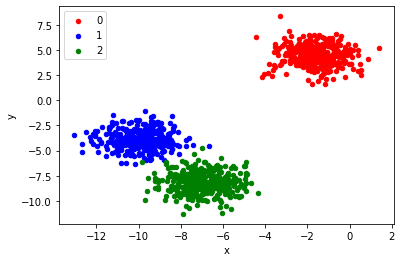

In [2]:
# generate 2d classification dataset as blobs
X_blobs, y_blobs = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=1)
# scatter plot, dots colored by class value
df_blobs = DataFrame(dict(x=X_blobs[:,0], y=X_blobs[:,1], label=y_blobs))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df_blobs.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

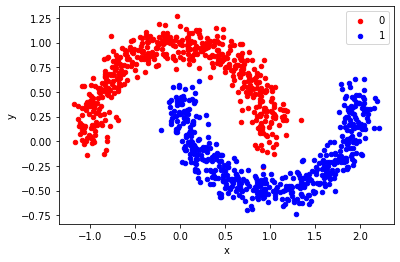

In [3]:
# generate 2d classification dataset as moons
X_moons, y_moons = make_moons(n_samples=1000, noise=0.1, random_state=0)
# scatter plot, dots colored by class value
df_moons = DataFrame(dict(x=X_moons[:,0], y=X_moons[:,1], label=y_moons))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df_moons.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

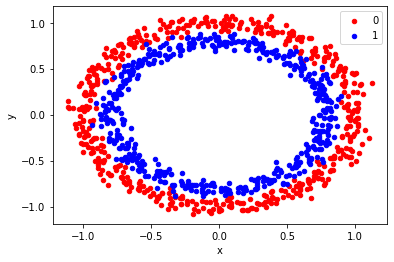

In [4]:
# generate 2d classification dataset as circles
X_circles, y_circles = make_circles(n_samples=1000, noise=0.05, random_state=0)
# scatter plot, dots colored by class value
df_circles = DataFrame(dict(x=X_circles[:,0], y=X_circles[:,1], label=y_circles))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df_circles.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [5]:
# Splitting the test for testing and validation
#BLOBS
X_blobs_test=X_blobs[:len(X_blobs)//4]
X_blobs_val=X_blobs[len(X_blobs)//4:]
y_blobs_test=y_blobs[:len(y_blobs)//4]
y_blobs_val=y_blobs[len(y_blobs)//4:]
#MOONS
X_moons_test=X_moons[:len(X_moons)//4]
X_moons_val=X_moons[len(X_moons)//4:]
y_moons_test=y_moons[:len(y_moons)//4]
y_moons_val=y_moons[len(y_moons)//4:]
#CIRCLES
X_circles_test=X_circles[:len(X_circles)//4]
X_circles_val=X_circles[len(X_circles)//4:]
y_circles_test=y_circles[:len(y_circles)//4]
y_circles_val=y_circles[len(y_circles)//4:]


For the first comparison we use two classifiers:
- SVM with linear Kernel
- SVM with non linear Kernel (RBF)

In [6]:
# Initializing Classifiers

clf1 = SVC(kernel='linear', random_state=0, probability=True)
clf2 = SVC(kernel='rbf', random_state=0, probability=True)

clfs = [clf1, clf2]
labels = ['SVM (linear)','SVM (RBF)']

In [7]:
# Plotting Decision Regions

def plot_decision(X, y, clfs,labels):
    gs = gridspec.GridSpec(2, 2)
    fig = plt.figure(figsize=(10, 8))
    labels = labels
    data_clf_fitted=[];
    
    for clf, lab, grd in zip(clfs,
                            labels,
                            itertools.product([0, 1],
                            repeat=2)):
        clf.fit(X, y)
        data_clf_fitted.append(clf)
        ax = plt.subplot(gs[grd[0], grd[1]])
        fig = plot_decision_regions(X=X, y=y,
                                    clf=clf, legend=2)
        plt.title(lab)

    plt.show()
    return data_clf_fitted

In [8]:
def plot_mcnamer_table(y_target,y_model1,y_model2):
    tb = mcnemar_table(y_target,
                       y_model1, 
                       y_model2)
   
    plt.imshow(tb, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("McNemar's Test", fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(1)
    plt.xticks(tick_marks, rotation=45)
    plt.yticks(tick_marks)
    plt.grid(False)
    thresh = tb.max() / 2.
    for i, j in itertools.product(range(tb.shape[0]), range(tb.shape[1])):
        plt.text(j, i, tb[i, j],
                 horizontalalignment="center",
                 color="white" if tb[i, j] > thresh else "black",
                 size="22")

    plt.tight_layout()
    accuracy(tb)
    chi_squared(tb)
    

In [9]:
def accuracy(tb):
    A=tb[0][0]
    B=tb[0][1]
    C=tb[1][0]
    D=tb[1][1]
    Accuracy1 = (A+B)/(A+B+C+D)*100
    print("Accuracy Model 1: " +str(Accuracy1)+" %")
    
    Accuracy2 = (A+C)/(A+B+C+D)*100
    print("Accuracy Model 2: " +str(Accuracy2)+" %")


In [10]:
def chi_squared(tb):
    A=tb[0][0]
    B=tb[0][1]
    C=tb[1][0]
    D=tb[1][1]
    
    Chi_squared = pow((abs(B-C)-1), 2)/(B+C)
    print("Chi Squared : " +str(Chi_squared))
    

Here we plot the difference between linear and RBF kernels in the case of a blob distribution. We conclude that there is not a big difference in this case, because the data can be linearly separated.

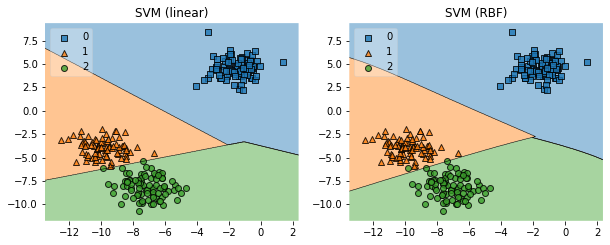

In [11]:
blobs_classifiers=plot_decision(X_blobs_test, y_blobs_test, clfs,labels)

Here, we can consider that the null hypothesis that there is no difference between both classification accuracies holds, due to the very small value of our omnibus test (chi squared), showing that the differences are so minimal they're irrelevant.
Also using McNemar's test, applied to paired nominal data based on a version of 2x2 confusion matrix that compares the predictions of two models to each other, we can conclude that the classifiers used return almost the same result. The accuracy of the two models is pretty much the same.

Accuracy Model 1: 99.6 %
Accuracy Model 2: 99.86666666666667 %
Chi Squared : 0.5


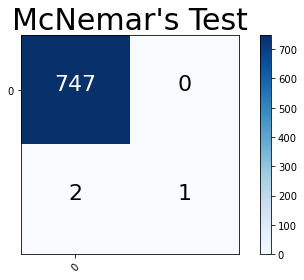

In [12]:
y_blobs_lin=blobs_classifiers[0].predict(X_blobs_val)
y_blobs_rbf=blobs_classifiers[1].predict(X_blobs_val)
plot_mcnamer_table(y_blobs_val,y_blobs_lin,y_blobs_rbf)

Here, for the moons, we start to take notice of the advantage of the RBF kernel. The linear kernel is unable to separate the two classes completly whereas the RBF can fit it perfecly.

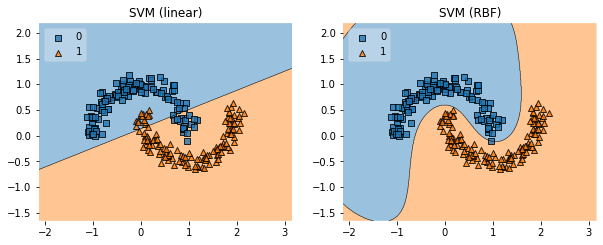

In [13]:
moons_classifiers=plot_decision(X_moons_test, y_moons_test, clfs,labels)

Here, with our chi squared value increased, showing that there is a more relevant difference in the models accuracies, thus rejecting the null hypothesis test.
Also from McNemar's test we can conclude that the second model (SVM (RBF)) is more accurete than the first one.

Accuracy Model 1: 87.06666666666666 %
Accuracy Model 2: 99.33333333333333 %
Chi Squared : 90.01086956521739


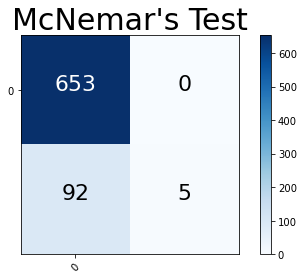

In [14]:
y_moons_lin=moons_classifiers[0].predict(X_moons_val)
y_moons_rbf=moons_classifiers[1].predict(X_moons_val)
plot_mcnamer_table(y_moons_val,y_moons_lin,y_moons_rbf)

In the case of the circular data, we can see that the linear kernel is useless, as it completly fails to distinguish between the two classes.

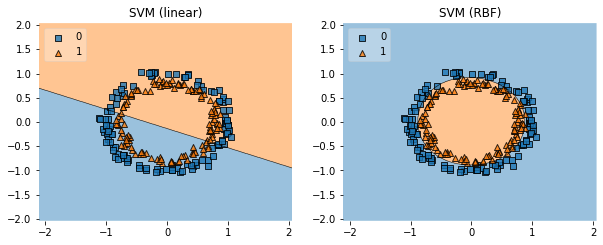

In [15]:
circles_classifiers=plot_decision(X_circles_test, y_circles_test, clfs,labels)

Here the chi squared value is even larger, telling us that there is a huge difference in the accuracies of both classifiers.
The linear mothel try to do his best splitting in half the two classes, as we can also see from the accuracy of that. The second classifier certainly split better the two classes.

Accuracy Model 1: 49.333333333333336 %
Accuracy Model 2: 96.39999999999999 %
Chi Squared : 332.1823056300268


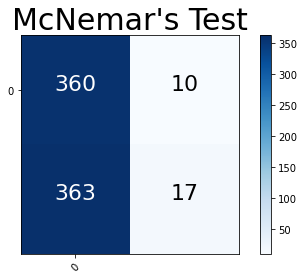

In [16]:
y_circles_lin=circles_classifiers[0].predict(X_circles_val)
y_circles_rbf=circles_classifiers[1].predict(X_circles_val)
plot_mcnamer_table(y_circles_val,y_circles_lin,y_circles_rbf)

For the second comparison we use:
- Perceptron (binary classifiers)
- Multi-layer Perceptron classifier (feedforward neural nework)

In [17]:
# Initializing Classifiers

ppn=Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=5000, tol=None, 
               eta0=0.1, n_jobs=1, random_state=0, class_weight=None, warm_start=False)
mlpc=MLPClassifier(random_state=1, max_iter=5000)
clfs2=[ppn,mlpc]
labels2 = ['Perceptron',
            'Multilayer feedforward neural network']

As in the previous classification in the case of blobs each models classify very well the problem.

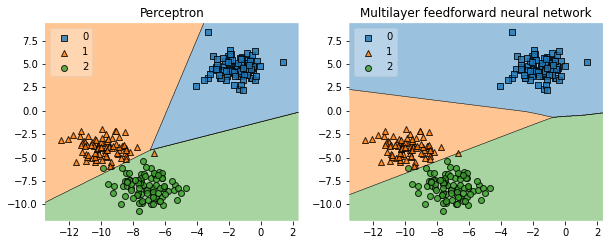

In [18]:
blobs_classifiers2=plot_decision(X_blobs_test,y_blobs_test, clfs2,labels2)

The accuracy is almost the same, and the chi squared value is very small, so both models are very similar in this classifications.

Accuracy Model 1: 99.6 %
Accuracy Model 2: 99.86666666666667 %
Chi Squared : 0.5


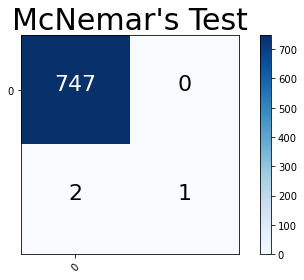

In [19]:
y_blobs_perpetron=blobs_classifiers2[0].predict(X_blobs_val)
y_blobs_MLPC=blobs_classifiers2[1].predict(X_blobs_val)
plot_mcnamer_table(y_blobs_val,y_blobs_perpetron,y_blobs_MLPC)

Using data that can't be devided linearly we can find the first difference. The second model classify much better the datas than the first

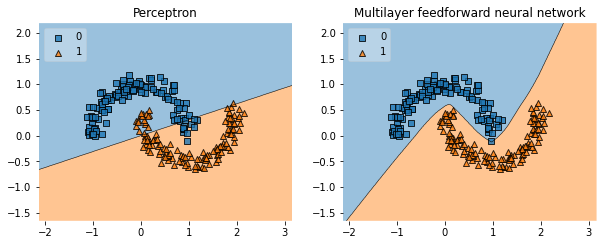

In [20]:
moons_classifiers2=plot_decision(X_moons_test,y_moons_test, clfs2,labels2)

Larger chi squared, meaningful difference in accuracies.
Also from the accuracy we can analyze this difference. The second model has nearly the 15% more than the other.

Accuracy Model 1: 86.93333333333332 %
Accuracy Model 2: 99.06666666666666 %
Chi Squared : 89.01098901098901


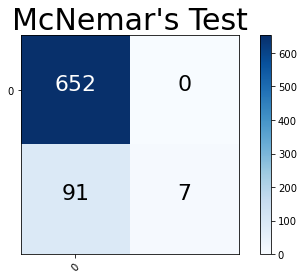

In [21]:
y_moons_perpetron=moons_classifiers2[0].predict(X_moons_val)
y_moons_MLPC=moons_classifiers2[1].predict(X_moons_val)
plot_mcnamer_table(y_moons_val,y_moons_perpetron,y_moons_MLPC)

With this dataset the Multilayer feedforword neural network is really more accurate than the perceptron classifier

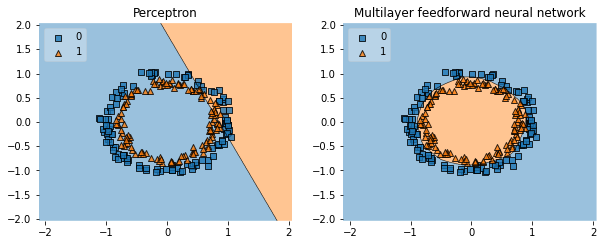

In [22]:
circles_classifiers2=plot_decision(X_circles_test,y_circles_test, clfs2,labels2)

Even larger chi squared, very large difference in accuracies across classifiers.
The accuracy of the first model is too low for using in with this dataset. The second model continue to classify very well the datas. 

Accuracy Model 1: 43.86666666666667 %
Accuracy Model 2: 96.13333333333334 %
Chi Squared : 364.002380952381


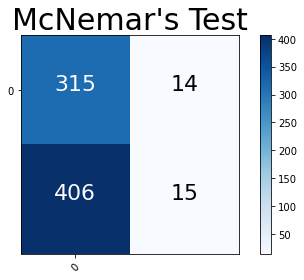

In [23]:
y_circles_perpetron=circles_classifiers2[0].predict(X_circles_val)
y_circles_MLPC=circles_classifiers2[1].predict(X_circles_val)
plot_mcnamer_table(y_circles_val,y_circles_perpetron,y_circles_MLPC)